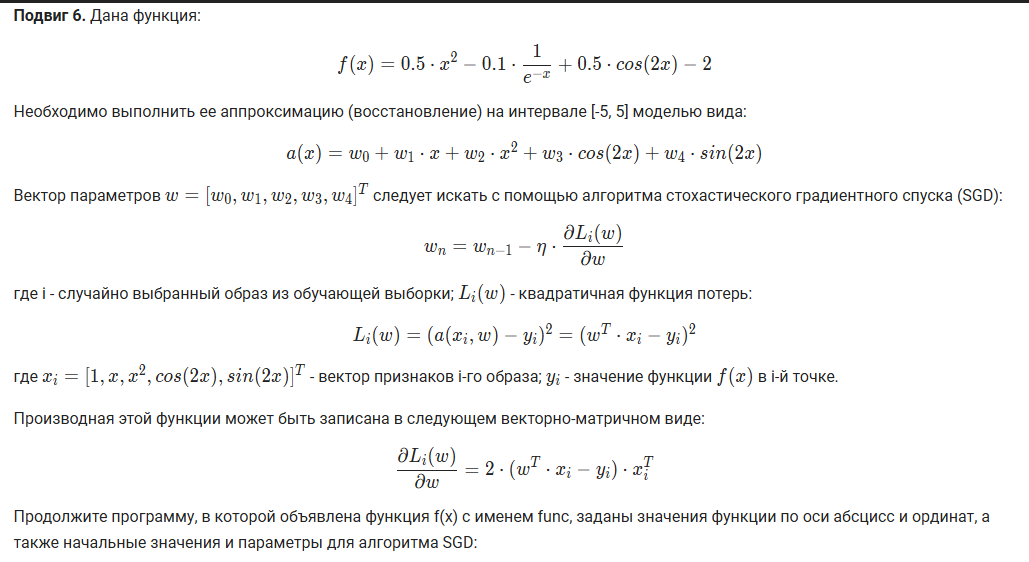
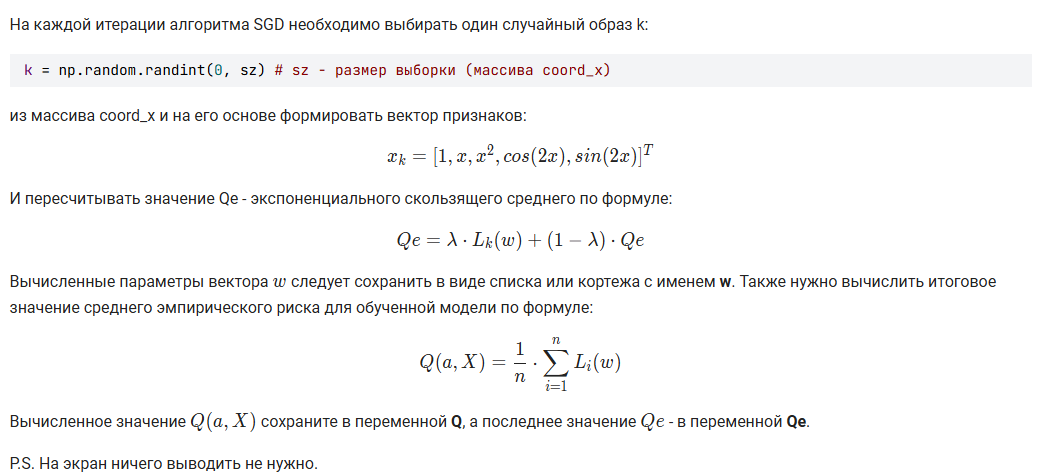

In [159]:
import numpy as np

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.5 * x**2 - 0.1 * 1/np.exp(-x) + 0.5 * np.cos(2*x) - 2.

def grad(x, w):
    return 2 * (w.T @ x - func(x[1])) * x.T

def loss(x, w):
    return (w.T @ x - func(x[1])) ** 2


coord_x = np.arange(-5.0, 5.0, 0.1) # значения по оси абсцисс [-5; 5] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.01, 0.001, 0.0001, 0.01, 0.01]) # шаг обучения для каждого параметра w0, w1, w2, w3, w4
w = np.array([0., 0., 0., 0., 0.]).T # начальные значения параметров модели
N = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего

X = np.array([[1, x, x**2, np.cos(2*x), np.sin(2*x)] for x in coord_x]).T
Qe = np.sum(loss(X, w)) / sz # начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел
for i in range(N):
    idx = np.random.randint(0, sz)  # выбираем случайный элемент выборки
    x = coord_x[idx]
    y = coord_y[idx]
    X = np.array([1, x, x**2, np.cos(2*x), np.sin(2*x)])

    w = w - eta * grad(X, w)  # изменяем веса

    Qe = lm * loss(X, w) + (1 - lm) * Qe  # перерасчет функционала качества
    

X = np.array([[1, x, x**2, np.cos(2*x), np.sin(2*x)] for x in coord_x]).T
Q = np.sum(loss(X, w)) / sz
Q, Qe, w

(1.4323446928853572,
 1.3168521492889733,
 array([-1.55870287, -0.77127223,  0.28664769,  0.8162054 , -0.14011833]))

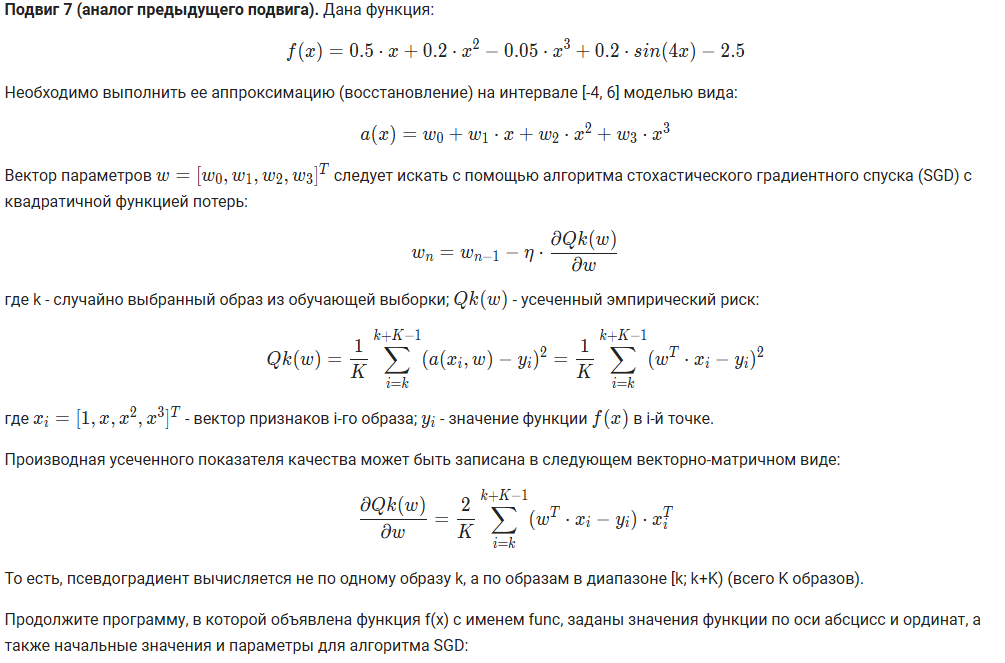

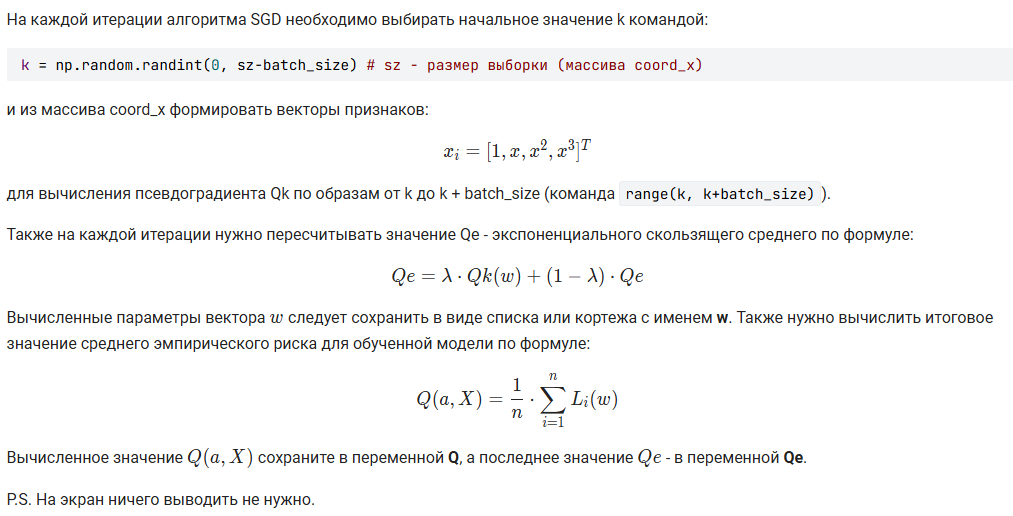

In [163]:
import numpy as np

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.05 * x ** 3 + 0.2 * np.sin(4 * x) - 2.5

# усеченный эмпирический риск
def Qk(w, k):
    return 1 / batch_size * np.sum((w.T @ X[k:k+batch_size].T - coord_y[k:k+batch_size]) ** 2)

def dQk(w, k):
    return 2/batch_size * (w.T @ X[k:k+batch_size].T - coord_y[k:k+batch_size]) @ X[k:k+batch_size]


coord_x = np.arange(-4.0, 6.0, 0.1) # значения по оси абсцисс [-4; 6] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

X = np.array([[1, x, x**2, x**3] for x in coord_x])

sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001]) # шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([0., 0., 0., 0.]).T # начальные значения параметров модели
N = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 50 # размер мини-батча (величина K = 50)

Qe = 1/sz * np.sum((w.T @ X.T - coord_y) ** 2) # начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

for i in range(N):
    k = np.random.randint(0, sz - batch_size)
    x = X[k]
    y = coord_y[k]

    w = w - eta * dQk(w, k)
    Qe = lm * Qk(w, k) + (1 - lm) * Qe


Q = 1/sz * np.sum((w.T @ X.T - coord_y) ** 2)
Q, Qe, w

(0.020109890217551937,
 0.020229625494357684,
 array([-2.49725214,  0.49451654,  0.19757031, -0.04967255]))